In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
oil_prices = pd.read_csv('../data/PA_chapter2_data/oil.csv')

In [3]:
oil_prices.tail()

,Year,Oil prices in constant 1997 dollars. 1870-1997
123,1993,17.15
124,1994,18.27
125,1995,19.40
126,1996,20.52
127,Oil prices in constant 1997 dollars. 1870-1997,NaN


In [5]:
# 去除错误数据集
oil_prices = oil_prices[~np.isnan(oil_prices[oil_prices.columns[1]])]
# 从数据中移除第二列的值是NAN的数据

In [6]:
oil_prices.tail()

,Year,Oil prices in constant 1997 dollars. 1870-1997
122,1992,18.38
123,1993,17.15
124,1994,18.27
125,1995,19.40
126,1996,20.52


In [7]:
#　查看数据列的格式
oil_prices.dtypes

Year                                               object
Oil prices in constant 1997 dollars. 1870-1997    float64
dtype: object

In [8]:
oil_prices.describe

<bound method NDFrame.describe of      Year  Oil prices in constant 1997 dollars. 1870-1997
0    1870                                           58.53
1    1871                                           49.09
2    1872                                           24.68
3    1873                                           16.71
4    1874                                           19.86
5    1875                                           38.23
6    1876                                           36.11
7    1877                                           19.59
8    1878                                           14.91
9    1879                                           15.74
10   1880                                           15.40
11   1881                                           13.06
12   1882                                           19.07
13   1883                                           15.28
14   1884                                           15.82
15   1885                             

In [9]:
oil_prices.head()

,Year,Oil prices in constant 1997 dollars. 1870-1997
0,1870,58.53
1,1871,49.09
2,1872,24.68
3,1873,16.71
4,1874,19.86


In [10]:
#　期望Year列是Python的日期类型。Pandas提供了內建的功能来执行这种转换
oil_prices = oil_prices.convert_objects(convert_dates='coerce')

/home/kongweikun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [11]:
oil_prices.head()

,Year,Oil prices in constant 1997 dollars. 1870-1997
0,1870-01-01,58.53
1,1871-01-01,49.09
2,1872-01-01,24.68
3,1873-01-01,16.71
4,1874-01-01,19.86


In [12]:
# 使用rename命令把价格(price)那一列重新命名更简单一些
oil_prices.rename(columns={oil_prices.columns[1]:'Oil_Price_1997_Dollars'},inplace=True)

In [13]:
oil_prices.head()

,Year,Oil_Price_1997_Dollars
0,1870-01-01,58.53
1,1871-01-01,49.09
2,1872-01-01,24.68
3,1873-01-01,16.71
4,1874-01-01,19.86


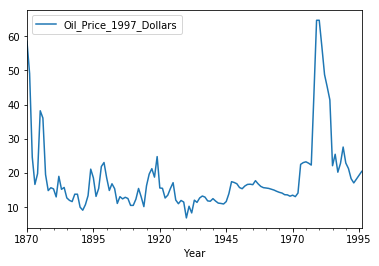

In [17]:
oil_prices.plot(x='Year',y='Oil_Price_1997_Dollars')

/home/kongweikun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  


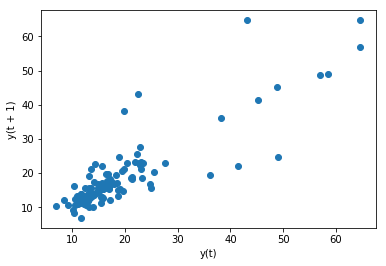

In [18]:
# 延迟图
from pandas.tools.plotting import lag_plot
lag_plot(oil_prices.Oil_Price_1997_Dollars)
# 观测相关性 把每年的石油价格绘制在横坐标上 把每次年的石油价格绘制在纵坐标上 
# 如果没有相关性 在图上就是一个环形的云

In [19]:
plt.figure

<function matplotlib.pyplot.figure>

In [20]:
data = pd.Series(0.1 * np.random.rand(1000) + 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))

/home/kongweikun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  """Entry point for launching an IPython kernel.


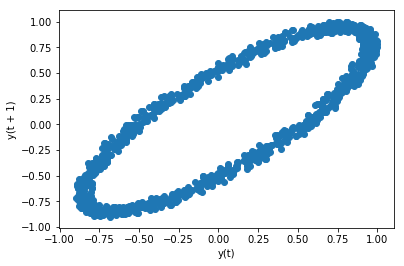

In [21]:
lag_plot(data)

In [22]:
data.head()

0    0.090577
1   -0.485626
2   -0.782589
3   -0.778768
4   -0.474286
dtype: float64

/home/kongweikun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


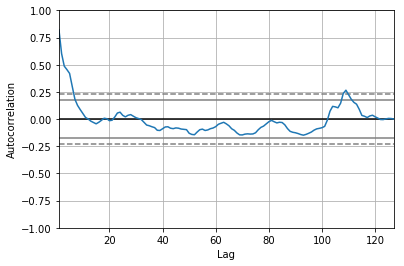

In [23]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(oil_prices['Oil_Price_1997_Dollars'])

In [37]:
car_crashes = pd.read_csv('../data/PA_chapter2_data/car_crashes.csv')

In [38]:
car_crashes.Year = car_crashes.Year.astype(str)

In [39]:
car_crashes = car_crashes.convert_objects(convert_dates='coerce')

/home/kongweikun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [40]:
car_crashes.head()

,Year,Car_Crash_Fatalities_US
0,1900-01-01,36
1,1901-01-01,54
2,1902-01-01,79
3,1903-01-01,117
4,1904-01-01,172


In [41]:
car_crashes['Car_Crash_Fatalities_US'] = car_crashes['Car_Crash_Fatalities_US']/1000

In [42]:
car_crashes.head()

,Year,Car_Crash_Fatalities_US
0,1900-01-01,0.036
1,1901-01-01,0.054
2,1902-01-01,0.079
3,1903-01-01,0.117
4,1904-01-01,0.172


In [43]:
# 两个数据进行整合 通过on变量指定列 以便将不同数据集中的行进行匹配
oil_prices_car_crashes = pd.merge(oil_prices,car_crashes,on='Year')

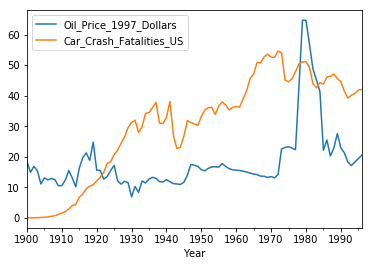

In [44]:
oil_prices_car_crashes.plot(x='Year')

/home/kongweikun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


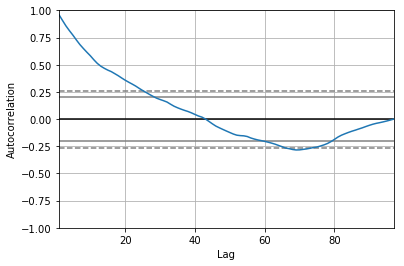

In [47]:
autocorrelation_plot(oil_prices_car_crashes[['Car_Crash_Fatalities_US','Oil_Price_1997_Dollars']])

In [46]:
oil_prices_car_crashes.head()

,Year,Oil_Price_1997_Dollars,Car_Crash_Fatalities_US
0,1900-01-01,18.64,0.036
1,1901-01-01,14.94,0.054
2,1902-01-01,16.90,0.079
3,1903-01-01,15.46,0.117
4,1904-01-01,11.15,0.172
